<a href="https://colab.research.google.com/github/21Akame03/STELLA/blob/Learning-pytorch/intro_to_pytorch_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchsummary import summary
#
from pytorchcv import load_mnist, train, plot_results
load_mnist(batch_size=128)

--2021-12-08 04:34:59--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: ‘pytorchcv.py.2’

pytorchcv.py.2      100%[===================>]   6.22K  --.-KB/s    in 0s      

2021-12-08 04:34:59 (68.3 MB/s) - ‘pytorchcv.py.2’ saved [6371/6371]



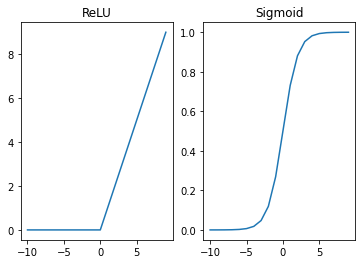

In [19]:
def plot_function(f, name="") :
  plt.plot(range(-10, 10), [f(torch.tensor(x, dtype=torch.float32)).item() for x in range(-10, 10)])
  plt.title(name)

# activation functions
plt.subplot(121)
plot_function(torch.relu, 'ReLU')
plt.subplot(122)
plot_function(torch.sigmoid, 'Sigmoid')

In [20]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax(dim=0)
)

summary(net, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 100]          78,500
              ReLU-3                  [-1, 100]               0
            Linear-4                   [-1, 10]           1,010
        LogSoftmax-5                   [-1, 10]               0
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.30
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


Epoch  0, Train acc=0.933, Val acc=0.950, Train loss=0.023, Val loss=0.022
Epoch  1, Train acc=0.959, Val acc=0.959, Train loss=0.022, Val loss=0.022
Epoch  2, Train acc=0.967, Val acc=0.964, Train loss=0.021, Val loss=0.022
Epoch  3, Train acc=0.969, Val acc=0.966, Train loss=0.021, Val loss=0.022
Epoch  4, Train acc=0.971, Val acc=0.961, Train loss=0.021, Val loss=0.022


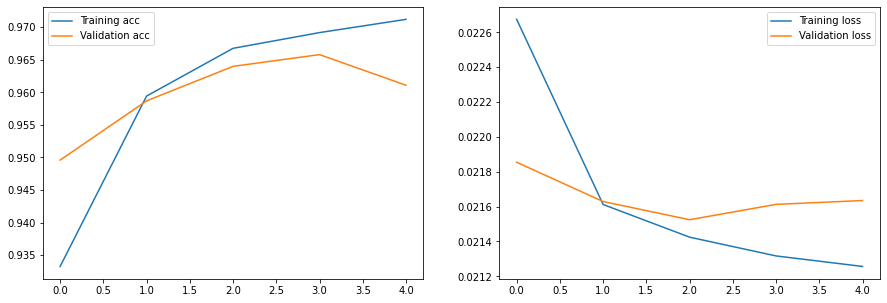

In [21]:
## This is an inaccurate model, (overfitting)
hist = train(net, train_loader, test_loader, epochs=5)
plot_results(hist)

In [25]:
from torch.nn.functional import relu, log_softmax

class MyNet(nn.Module) :
  def __init__(self):
    super(MyNet, self).__init__()
    self.flatten = nn.Flatten()
    self.hidden = nn.Linear(784, 100) #(num inputs, num outputs)
    self.out = nn.Linear(100, 10)

  def forward(self, x):
    x = self.flatten(x)
    x = self.hidden(x)
    x = relu(x)
    x = self.out(x)
    x = log_softmax(x, dim=0)
    return x

net = MyNet()
summary(net, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 100]          78,500
            Linear-3                   [-1, 10]           1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.30
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


Epoch  0, Train acc=0.932, Val acc=0.952, Train loss=0.023, Val loss=0.022
Epoch  1, Train acc=0.960, Val acc=0.960, Train loss=0.022, Val loss=0.022
Epoch  2, Train acc=0.966, Val acc=0.960, Train loss=0.021, Val loss=0.022
Epoch  3, Train acc=0.969, Val acc=0.962, Train loss=0.021, Val loss=0.022
Epoch  4, Train acc=0.971, Val acc=0.963, Train loss=0.021, Val loss=0.022


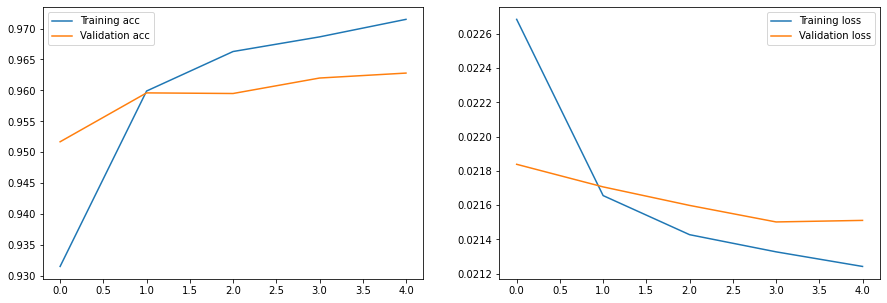

In [26]:
hist = train(net, train_loader, test_loader, epochs=5)
plot_results(hist)